In [1]:
import sys
sys.path.append('../../')

import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import pyHEPTools.Fit.utils
from pyHEPTools.Fit import LocalTemplateFit
import scipy.optimize


In [16]:
nbins = 10
s, b0, b1, bins = pyHEPTools.Fit.utils.fake_templates(nbins, nsignal=4000, nbkgd0=5000, nbkgd1=5000)
total = s + b0 + b1
mock_data = np.random.poisson(1.2 * s + 0.8 * b0 + b1)
cov, inv = pyHEPTools.Fit.utils.cov_inv(pyHEPTools.Fit.utils.poisson_multiverse(total, nuniverses=100))
errors = np.sqrt(cov.diagonal() + 1 / total)

total1 = 1.2 * s + 0.8 * b0 + b1

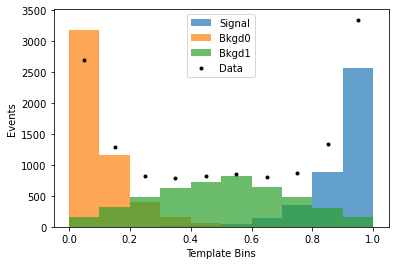

In [17]:
pyHEPTools.Fit.utils.plot_templates((s, b0, b1), ('Signal', 'Bkgd0', 'Bkgd1'), bins, data=mock_data, yerr=errors)


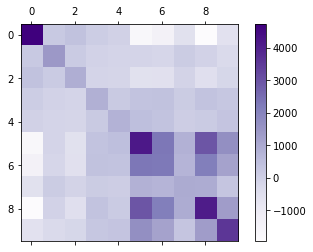

In [18]:
pyHEPTools.Fit.utils.plot_mat(cov)

In [19]:
fit = LocalTemplateFit(cov, (s, b0, b1))
#results = fit.minimize(total1)
results = fit.MINOS(total1)

In [20]:
print(results)

      dx: [(1.1808092860915784, 1.2191907139207325), (0.7825085374234501, 0.8174914625763217), (0.974626229760903, 1.0253737702463657)]
   e0_dw:       converged: True
           flag: 'converged'
 function_calls: 38
     iterations: 36
           root: 1.1808092860915784
   e0_up:       converged: True
           flag: 'converged'
 function_calls: 38
     iterations: 36
           root: 1.2191907139207325
   e1_dw:       converged: True
           flag: 'converged'
 function_calls: 38
     iterations: 36
           root: 0.7825085374234501
   e1_up:       converged: True
           flag: 'converged'
 function_calls: 38
     iterations: 36
           root: 0.8174914625763217
   e2_dw:       converged: True
           flag: 'converged'
 function_calls: 38
     iterations: 36
           root: 0.974626229760903
   e2_up:       converged: True
           flag: 'converged'
 function_calls: 38
     iterations: 36
           root: 1.0253737702463657
     fun: 1.5916974362938958e-11
    k(V): 

<ErrorbarContainer object of 3 artists>

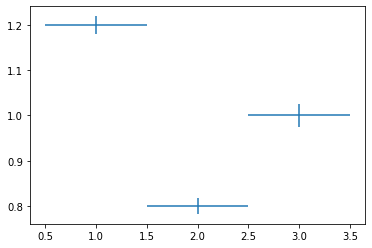

In [21]:
x = np.linspace(1, len(results.x), len(results.x))
plt.errorbar(x, results.x, ls='none', xerr=0.5, yerr=abs(np.array(results.dx).T-results.x))
